\hfill Department of Statistics

\hfill Jaeyeong Kim, Alex Ruiz

# EM algorithm
## x1

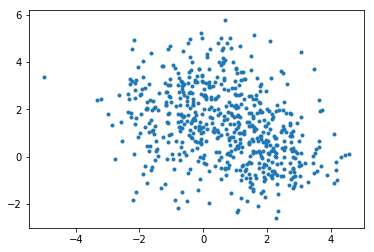

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn
%matplotlib inline

x1 = pd.read_csv('x1.txt', header = None,\
                      delimiter = ',').dropna(axis='columns')
plt.plot(x1[0], x1[1], '.')
plt.show()

In [2]:
GM = GaussianMixture(n_components = 2, init_params = 'kmeans')
GM.fit(x1)
print('Weights')
print(GM.weights_)
print('Means')
print(GM.means_)
print('Covariances')
print(GM.covariances_)

Weights
[0.56407429 0.43592571]
Means
[[-0.2793051   2.14905683]
 [ 1.87144943  0.2727981 ]]
Covariances
[[[ 1.5770097   0.34995366]
  [ 0.34995366  2.09335248]]

 [[ 1.07114577 -0.08532077]
  [-0.08532077  1.21986355]]]


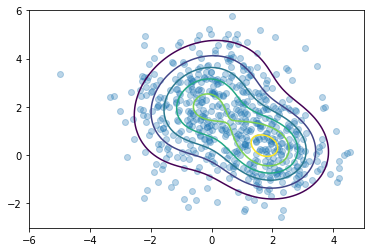

In [3]:
intervals = 100
xs = np.linspace(-6,5,intervals)
ys = np.linspace(-2.5,6,intervals)
X, Y = np.meshgrid(xs, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

pis = GM.weights_
mus = GM.means_
sigmas = GM.covariances_
z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis, mus, sigmas):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

plt.scatter(x1[0], x1[1], alpha=0.3)
plt.contour(X, Y, z)
plt.show()

## x2

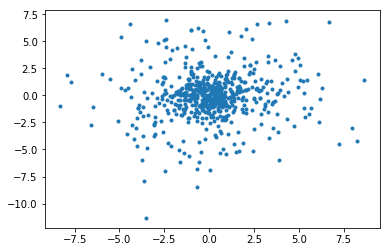

In [4]:
x2 = pd.read_csv('x2.txt', header = None,\
                      delimiter = ',').dropna(axis='columns')
plt.plot(x2[0], x2[1], '.')
plt.show()

In [5]:
GM = GaussianMixture(n_components = 2, init_params = 'kmeans')
GM.fit(x2)
print('Weights')
print(GM.weights_)
print('Means')
print(GM.means_)
print('Covariances')
print(GM.covariances_)

Weights
[0.54274913 0.45725087]
Means
[[ 0.02397776 -0.04247689]
 [ 0.1775722  -0.13528397]]
Covariances
[[[1.19269061 0.08958393]
  [0.08958393 0.95331849]]

 [[9.65717642 0.78814483]
  [0.78814483 9.90978393]]]


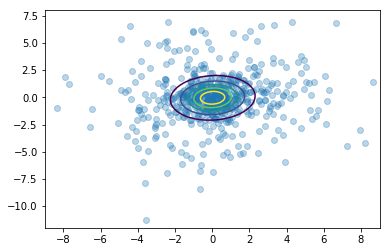

In [6]:
intervals = 100
xs = np.linspace(-9,9,intervals)
ys = np.linspace(-12,8,intervals)
X, Y = np.meshgrid(xs, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

pis = GM.weights_
mus = GM.means_
sigmas = GM.covariances_
z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis, mus, sigmas):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

plt.scatter(x2[0], x2[1], alpha=0.3)
plt.contour(X, Y, z)
plt.show()

## x easy

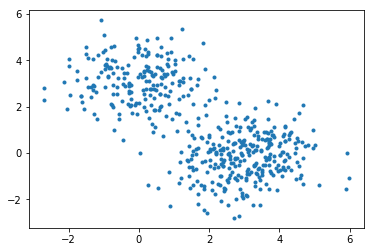

In [7]:
xeasy = pd.read_csv('xeasy.txt', header = None,\
                      delimiter = ',').dropna(axis='columns')
plt.plot(xeasy[0], xeasy[1], '.')
plt.show()

In [8]:
GM = GaussianMixture(n_components = 2, init_params = 'kmeans')
GM.fit(xeasy)
print('Weights')
print(GM.weights_)
print('Means')
print(GM.means_)
print('Covariances')
print(GM.covariances_)

Weights
[0.592129 0.407871]
Means
[[ 3.01650103 -0.17460086]
 [ 0.02478088  3.07460079]]
Covariances
[[[ 1.00808335  0.15670429]
  [ 0.15670429  0.94521241]]

 [[ 1.01363993 -0.05311694]
  [-0.05311694  0.94863522]]]


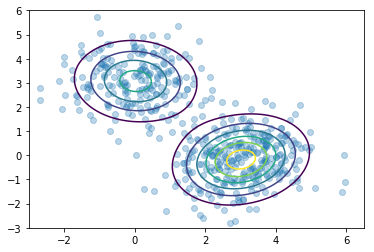

In [9]:
intervals = 100
xs = np.linspace(-3,6.5,intervals)
ys = np.linspace(-3,6,intervals)
X, Y = np.meshgrid(xs, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

pis = GM.weights_
mus = GM.means_
sigmas = GM.covariances_
z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis, mus, sigmas):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

plt.scatter(xeasy[0], xeasy[1], alpha=0.3)
plt.contour(X, Y, z)
plt.show()

# Two-step EM algorithm

In [10]:
# code is from https://people.duke.edu/~ccc14/sta-663/EMAlgorithm.html

from numpy.core.umath_tests import matrix_multiply as mm

def em_gmm_vect(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)

    ll_old = 0
    for i in range(max_iter):
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(k):
            ws[j, :] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs)
        ws /= ws.sum(0)

        # M-step
        pis = ws.sum(axis=1)
        pis /= n

        mus = np.dot(ws, xs)
        mus /= ws.sum(1)[:, None]

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            ys = xs - mus[j, :]
            sigmas[j] = (ws[j,:,None,None] * \
                         mm(ys[:,:,None], ys[:,None,:])).sum(axis=0)
        sigmas /= ws.sum(axis=1)[:,None,None]

        # update complete log likelihoood
        ll_new = 0
        for pi, mu, sigma in zip(pis, mus, sigmas):
            ll_new += pi*mvn(mu, sigma).pdf(xs)
        ll_new = np.log(ll_new).sum()

        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return pis, mus, sigmas

C:\Users\Jay_Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import heapq
def find_two(pis, mus, sigmas):
    largest_pis = heapq.nlargest(2, pis)
    first = largest_pis[0]
    second = largest_pis[1]
    a, = np.where(pis == first)
    b, = np.where(pis == second)
    pis_new = np.array([first, second])
    mus_new = np.append(mus[a], mus[b], axis = 0)
    sigmas_new = np.append(sigmas[a], sigmas[b], axis = 0)
    
    return pis_new, mus_new, sigmas_new 

## x1

In [12]:
x1 = np.array(x1)
k = 100
n, m = x1.shape
while k != 2:
    random_inits = np.random.random_integers(0, n-1, 3)
    pis = [1/3, 1/3, 1/3]
    mus = x1[random_inits]
    small_sig_1 = min(np.linalg.norm(mus[0] - mus[1]), np.linalg.norm(mus[0] - mus[2]))
    small_sig_2 = min(np.linalg.norm(mus[1] - mus[0]), np.linalg.norm(mus[1] - mus[2]))
    small_sig_3 = min(np.linalg.norm(mus[2] - mus[0]), np.linalg.norm(mus[2] - mus[1]))
    sigmas = np.array([(small_sig_1**2)*np.eye(2), (small_sig_2**2)*np.eye(2), (small_sig_3**2)*np.eye(2)])
    pis, mus, sigmas = em_gmm_vect(x1, pis, mus, sigmas)
    k = pis[pis > 1/12].size

C:\Users\Jay_Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 599 + 1) instead
  """


In [13]:
pis, mus, sigmas = find_two(pis, mus, sigmas)
pis, mus, sigmas = em_gmm_vect(x1, pis, mus, sigmas)
print('Weights')
print(pis)
print('Means')
print(mus)
print('Covariances')
print(sigmas)

Weights
[0.63952227 0.36047773]
Means
[[-0.13290375  1.99013123]
 [ 2.0618722   0.16204653]]
Covariances
[[[ 1.67082791  0.17611355]
  [ 0.17611355  2.20652644]]

 [[ 0.87360056 -0.05476864]
  [-0.05476864  1.10039448]]]


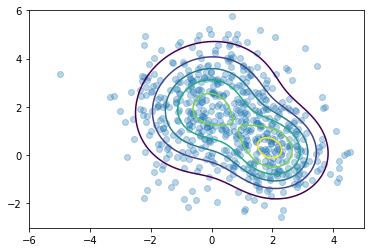

In [14]:
intervals = 100
xs = np.linspace(-6,5,intervals)
ys = np.linspace(-2.5,6,intervals)
X, Y = np.meshgrid(xs, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis, mus, sigmas):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

plt.scatter(x1[:,0], x1[:,1], alpha=0.3)
plt.contour(X, Y, z)
plt.show()

## x2

In [15]:
x2 = np.array(x2)
n, m = x2.shape
k = 100
while k != 2:
    random_inits = np.random.random_integers(0, n-1, 3)
    pis = [1/3, 1/3, 1/3]
    mus = x2[random_inits]
    small_sig_1 = min(np.linalg.norm(mus[0] - mus[1]), np.linalg.norm(mus[0] - mus[2]))
    small_sig_2 = min(np.linalg.norm(mus[1] - mus[0]), np.linalg.norm(mus[1] - mus[2]))
    small_sig_3 = min(np.linalg.norm(mus[2] - mus[0]), np.linalg.norm(mus[2] - mus[1]))
    sigmas = np.array([(small_sig_1**2)*np.eye(2), (small_sig_2**2)*np.eye(2), (small_sig_3**2)*np.eye(2)])
    pis, mus, sigmas = em_gmm_vect(x2, pis, mus, sigmas)
    k = pis[pis > 1/12].size

C:\Users\Jay_Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 599 + 1) instead
  """


In [16]:
pis, mus, sigmas = find_two(pis, mus, sigmas)
pis, mus, sigmas = em_gmm_vect(x2, pis, mus, sigmas)
print('Weights')
print(pis)
print('Means')
print(mus)
print('Covariances')
print(sigmas)

Weights
[0.51500661 0.48499339]
Means
[[ 0.0141588  -0.0451122 ]
 [ 0.17921291 -0.12717685]]
Covariances
[[[1.07278221 0.06690607]
  [0.06690607 0.89542118]]

 [[9.29836026 0.77194877]
  [0.77194877 9.4598746 ]]]


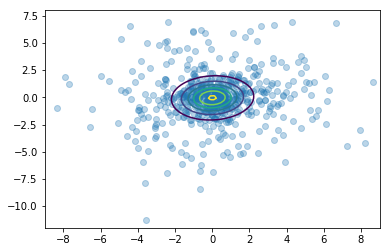

In [17]:
intervals = 100
xs = np.linspace(-9,9,intervals)
ys = np.linspace(-12,8,intervals)
X, Y = np.meshgrid(xs, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis, mus, sigmas):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

plt.scatter(x2[:,0], x2[:,1], alpha=0.3)
plt.contour(X, Y, z)
plt.show()

## xeasy

In [18]:
xeasy = np.array(xeasy)
k = 100
n, m = xeasy.shape
while k != 2:
    random_inits = np.random.random_integers(0, n-1, 3)
    pis = [1/3, 1/3, 1/3]
    mus = xeasy[random_inits]
    small_sig_1 = min(np.linalg.norm(mus[0] - mus[1]), np.linalg.norm(mus[0] - mus[2]))
    small_sig_2 = min(np.linalg.norm(mus[1] - mus[0]), np.linalg.norm(mus[1] - mus[2]))
    small_sig_3 = min(np.linalg.norm(mus[2] - mus[0]), np.linalg.norm(mus[2] - mus[1]))
    sigmas = np.array([(small_sig_1**2)*np.eye(2), (small_sig_2**2)*np.eye(2), (small_sig_3**2)*np.eye(2)])
    pis, mus, sigmas = em_gmm_vect(xeasy, pis, mus, sigmas)
    k = pis[pis > 1/12].size

C:\Users\Jay_Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 499 + 1) instead
  """


In [19]:
pis, mus, sigmas = find_two(pis, mus, sigmas)
pis, mus, sigmas = em_gmm_vect(xeasy, pis, mus, sigmas)
print('Weights')
print(pis)
print('Means')
print(mus)
print('Covariances')
print(sigmas)

Weights
[0.59040118 0.40959882]
Means
[[ 3.02069713 -0.17905836]
 [ 0.03135261  3.06731971]]
Covariances
[[[ 1.00310779  0.16267883]
  [ 0.16267883  0.93971945]]

 [[ 1.02228325 -0.0628996 ]
  [-0.0628996   0.9592356 ]]]


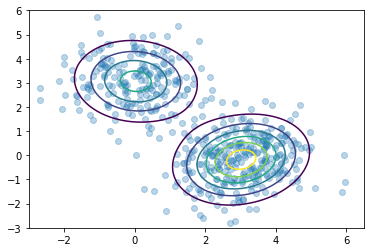

In [20]:
intervals = 100
xs = np.linspace(-3,6.5,intervals)
ys = np.linspace(-3,6,intervals)
X, Y = np.meshgrid(xs, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis, mus, sigmas):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

plt.scatter(xeasy[:,0], xeasy[:,1], alpha=0.3)
plt.contour(X, Y, z)
plt.show()